In [1]:
%matplotlib inline
#Standard imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group

#own modules
from sigmoid import g,dg,ddg,dddg, plot_sigmoid
import myplots
from tensor_util import *
from main_function import f, df, ddf, dddf




In [2]:
def uniformSphere(d, m_x):
    x = np.random.normal(size=(m_x,d))
    for i in range(m_x):
        x[i] = x[i] / np.linalg.norm(x[i])
    return x

def perm_matrix(m):
    P = np.identity(m)
    P = np.random.permutation(P)#permutes only the rows
    return P, np.linalg.inv(P)
def decomp_svd_dd(X,A,B, randomize=False):
    """tbd.

    Parameters
    ----------
    X : matrix
        m_x samples \in R^m
    A : matrix
        m orthonormal vectors \in R^m
    B : matrix
        m_1 orthonormal vectors \in R^m
    randomize: bool
        if true performs a random unfolding
    Returns
    -------
    alot
        True if successful, False otherwise.
    """
    m = A.shape[1]
    ddf_values = ddf(X,A,B)
    unfolds = [np.reshape(dd, (m**2,)) for dd in ddf_values]
    
    if randomize:
        P,Q = perm_matrix(m**2)
        unfolds = [np.dot(P,v) for v in unfolds]
        
    M = np.transpose(np.array(unfolds))
    U,D,V = np.linalg.svd(M)
    if randomize: 
        U = np.dot(Q,U)
    return ddf_values, U, D
        
    
def decomp_svd_ddd(X,A,B, randomize=False):
    """tbd.

    Parameters
    ----------
    X : matrix
        m_x samples \in R^m
    A : matrix
        m orthonormal vectors \in R^m
    B : matrix
        m_1 orthonormal vectors \in R^m
    randomize: bool
        if true performs a random unfolding
    Returns
    -------
    alot
        True if successful, False otherwise.
    """
    m = A.shape[1]
    dddf_values = dddf(X,A,B)
    unfolds = [np.reshape(dd, (m**3,)) for dd in dddf_values]
    
    if randomize:
        P,Q = perm_matrix(m**3)
        unfolds = [np.dot(P,v) for v in unfolds]
        
    M = np.transpose(np.array(unfolds))
    U,D,V = np.linalg.svd(M)
    if randomize: 
        U = np.dot(Q,U)
    return dddf_values, U, D

In [3]:
#Setting parameters, and creating data
m = 3
m_1 = 1
m_x = 1000
X = uniformSphere(m, m_x)
A = ortho_group.rvs(dim = m)# m orthogonal vectors with dim m, a_1, ..., a_m
A = np.transpose(A)
B = ortho_group.rvs(dim = m)[:m_1]#m_1 orthogonal vectors with dimension m b_1, ..., b_m_1
B = np.transpose(B)

dist(U[:, :4], a_0*a_0) = [1.3960299760884896, 0.060316819299503548, 1.409411398834193, 1.3753779979015122]
dist(U[:, :4], a_1*a_1) = [0.058251341884043191, 1.3940391925843572, 1.4124941904205293, 1.3778159309790259]
dist(U[:, :4], a_2*a_2) = [1.4135726308428098, 1.4119858245813217, 0.067413329401421848, 1.3658084234257686]
(sv_1+ ...+ sv_4)/(sum_i sv_i)=0.9936216858710183


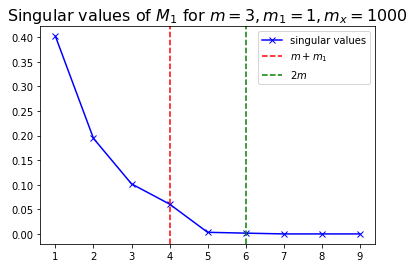

In [4]:
ddf_values, U_dd, D_dd = decomp_svd_dd(X,A,B,randomize=True)
myplots.plot_singular_values(D_dd, m, m_1, m_x)
k = m+m_1
for i in range(m):
    print("dist(U[:, :{}], a_{}*a_{}) = {}".format(k,i,i,tensor_distance_to_columns(A[:,i], U_dd, k, mode=2)))

ratio_sv = np.sum(D_dd[:k])/np.sum(D_dd)
print("(sv_1+ ...+ sv_{})/(sum_i sv_i)={}".format(k, ratio_sv))

dist(U[:, :4], a_0*a_0*a_0) = 0.5321880548831919
dist(U[:, :4], a_1*a_1*a_1) = 0.47911281700919817
dist(U[:, :4], a_2*a_2*a_2) = 0.31701118940814643
(sv_1+ ...+ sv_4)/(sum_i sv_i)=0.9683698216328702


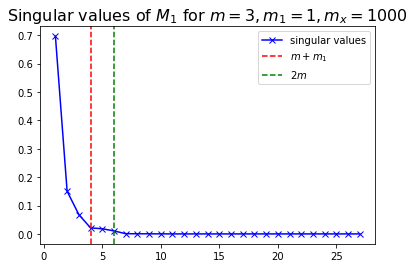

In [5]:
dddf_values, U_ddd, D_ddd = decomp_svd_ddd(X,A,B, randomize=False)
myplots.plot_singular_values(D_ddd, m,m_1,m_x)
k = m+m_1
for i in range(m):
    print("dist(U[:, :{}], a_{}*a_{}*a_{}) = {}".format(k,i,i,i,np.min(tensor_distance_to_columns(A[:,i], U_ddd, k, mode=3))))

ratio_sv = np.sum(D_ddd[:k])/np.sum(D_ddd)
print("(sv_1+ ...+ sv_{})/(sum_i sv_i)={}".format(k, ratio_sv))

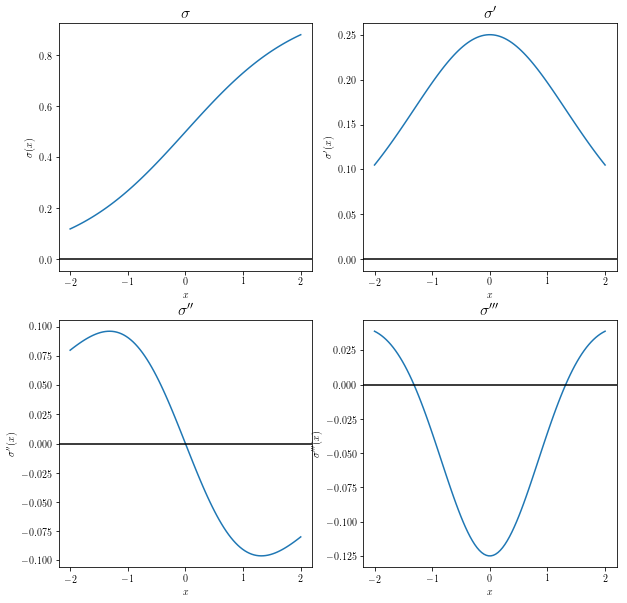

In [6]:
plot_sigmoid()

In [7]:
m = [2**k for k in range(1,6)]
m_x = [8**k for k in range(1, 5)]
m_1 = 1
ratio_dd = np.zeros((5,4))
ratio_ddd = np.zeros((5,4))
average_dists_dd = np.zeros((5,4))
average_dists_ddd = np.zeros((5,4))

for i in range(5):
    for j in range(i, 4):
        print("\n*****************************************************")
        print("Running for m={},m_1={}, m_x={}:\n".format(m[i],m_1,m_x[j]))
        X = uniformSphere(m[i], m_x[j])
        A = ortho_group.rvs(dim = m[i])
        A = np.transpose(A)
        B = ortho_group.rvs(dim = m[i])[:m_1]
        B = np.transpose(B)
        print("\nSVD for unfolding of second derivative:")
        ddf_values, U_dd, D_dd = decomp_svd_dd(X,A,B,randomize=True)
        k = m[i]+m_1

        ratio_sv = np.sum(D_dd[:k])/np.sum(D_dd)
        ratio_dd[i,j] = ratio_sv
        print("Ratio sv: (sv_1+ ...+ sv_{})/(sum_i sv_i)={}\n".format(k, ratio_sv))
        
        dists = []
        for ind in range(m[i]):
            d = np.min(tensor_distance_to_columns(A[:,ind], U_dd, k, mode=2))
            dists.append(d)
            print("dist(U[:, :{}], a_{}*a_{}) = {}".format(k,ind,ind,d))
        avg = np.mean(dists)
        average_dists_dd[i,j]=avg
        print("Average dist: {}".format(avg))
        

        
        print("\nSVD for unfolding of third derivative:")
        dddf_values, U_ddd, D_ddd = decomp_svd_ddd(X,A,B,randomize=True)
        k = m[i]+m_1
        
        ratio_sv = np.sum(D_ddd[:k])/np.sum(D_ddd)
        ratio_ddd[i,j] = ratio_sv
        print("Ratio sv: (sv_1+ ...+ sv_{})/(sum_i sv_i)={}\n".format(k, ratio_sv))
        
        dists = []
        for ind in range(m[i]):
            d = np.min(tensor_distance_to_columns(A[:,ind], U_ddd, k, mode=3))
            dists.append(d)
            print("dist(U[:, :{}], a_{}*a_{}*a_{}) = {}".format(k,ind,ind,ind,d))
            

        avg = np.mean(dists)
        average_dists_dd[i,j]=avg
        print("Average dist: {}".format(avg))


*****************************************************
Running for m=2,m_1=1, m_x=8:


SVD for unfolding of second derivative:
Ratio sv: (sv_1+ ...+ sv_3)/(sum_i sv_i)=1.0

dist(U[:, :3], a_0*a_0) = 0.13551643165665986
dist(U[:, :3], a_1*a_1) = 0.018606822606416207
Average dist: 0.07706162713153804

SVD for unfolding of third derivative:
Ratio sv: (sv_1+ ...+ sv_3)/(sum_i sv_i)=0.9979786863611659

dist(U[:, :3], a_0*a_0*a_0) = 0.0677496526564279
dist(U[:, :3], a_1*a_1*a_1) = 0.05323431942794471
Average dist: 0.06049198604218631

*****************************************************
Running for m=2,m_1=1, m_x=64:


SVD for unfolding of second derivative:
Ratio sv: (sv_1+ ...+ sv_3)/(sum_i sv_i)=1.0

dist(U[:, :3], a_0*a_0) = 0.16575153364251896
dist(U[:, :3], a_1*a_1) = 0.17790437119782593
Average dist: 0.17182795242017246

SVD for unfolding of third derivative:
Ratio sv: (sv_1+ ...+ sv_3)/(sum_i sv_i)=0.9664134712386482

dist(U[:, :3], a_0*a_0*a_0) = 0.6944152075828018
dist(U[:, :3], a

In [8]:
ratio_dd

array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.99788338,  0.98978828,  0.99609685],
       [ 0.        ,  0.        ,  0.99416665,  0.98739798],
       [ 0.        ,  0.        ,  0.        ,  0.99839965],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [9]:
ratio_ddd

array([[ 0.99797869,  0.96641347,  0.99092524,  0.99231391],
       [ 0.        ,  0.99158587,  0.95830775,  0.98111159],
       [ 0.        ,  0.        ,  0.97611764,  0.94948144],
       [ 0.        ,  0.        ,  0.        ,  0.99369739],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [10]:
from mpl_toolkits.mplot3d import Axes3D
X,Y = np.meshgrid(m, m_x)
fig = plt.figure()
#ax=fig.gca(projection="3d")
surf = ax.plot_surface(X,Y, ratio_dd, cmap="coolwarm", linewidth=0)

NameError: name 'ax' is not defined

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X,Y,ratio_dd)

In [ ]:
ratio_dd